In [102]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [104]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/MyDrive/kaggle


In [105]:
image_size = (28, 28)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "flowers",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [106]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [107]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


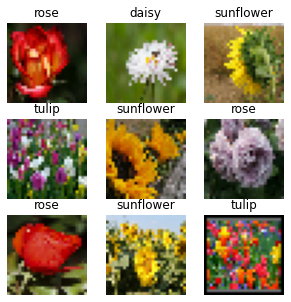

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [109]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [114]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(1000, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(500, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(num_classes)
])

In [115]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 1000)      28000     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 1000)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 500)       4500500   
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 500)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 250)        

In [117]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10
)

Epoch 1/10
108/108 [==============================] - 468s 4s/step - loss: 1.3112 - accuracy: 0.4157 - val_loss: 1.1948 - val_accuracy: 0.5110
Epoch 2/10
108/108 [==============================] - 435s 4s/step - loss: 1.0624 - accuracy: 0.5631 - val_loss: 1.0535 - val_accuracy: 0.5539
Epoch 3/10
108/108 [==============================] - 432s 4s/step - loss: 0.9966 - accuracy: 0.6002 - val_loss: 0.9005 - val_accuracy: 0.6570
Epoch 4/10
108/108 [==============================] - 433s 4s/step - loss: 0.8748 - accuracy: 0.6500 - val_loss: 0.9080 - val_accuracy: 0.6443
Epoch 5/10
108/108 [==============================] - 433s 4s/step - loss: 0.7883 - accuracy: 0.6891 - val_loss: 0.8011 - val_accuracy: 0.6860
Epoch 6/10
108/108 [==============================] - 444s 4s/step - loss: 0.7365 - accuracy: 0.7140 - val_loss: 0.6846 - val_accuracy: 0.7335
Epoch 7/10
108/108 [==============================] - 441s 4s/step - loss: 0.6266 - accuracy: 0.7678 - val_loss: 0.6031 - val_accuracy: 0.7683

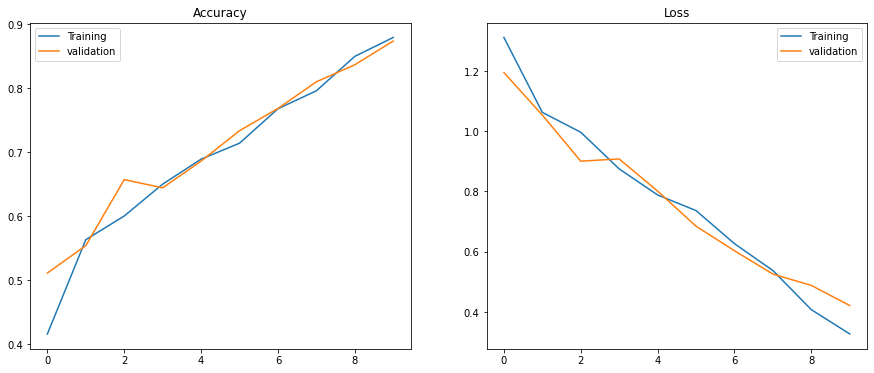

In [124]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['accuracy'],label = 'Training')
plt.plot(history.epoch,history.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['loss'],label = 'Training')
plt.plot(history.epoch,history.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()